- sparse autoencoder
- tensorflow

- mnist
- 1-hidden layer

In [1]:
import tensorflow as tf
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import argparse
from tensorflow.examples.tutorials.mnist import input_data
# mnist dataset
mnist = input_data.read_data_sets("./samples/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./samples/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./samples/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./samples/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./samples/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# layer param
n_inputs = 28*28
n_hidden_1 = 10
n_outputs = n_inputs
n_test = 4

# hyper param
lr = 0.1
n_epoch = 10
n_iter = 1000
weight_decay = 0.001
threshold = 0.000001
n_valid = 500 #print loss

In [3]:
def imshow(test_input, test_output, row, col):
    fig = plt.figure()
    
    for r in range(row):
        ax = fig.add_subplot(row, col, 2*r+1)
        ax.imshow(test_input[r].reshape(28,28))
        ax.set_ylabel('{0} input'.format(r+1))

        bx = fig.add_subplot(row, col, 2*r+2)
        bx.imshow(test_output[r].reshape(28,28))
        bx.set_ylabel('{0} output'.format(r+1))
        
    plt.show()

In [4]:
# He initialize
he_init = tf.keras.initializers.he_normal()

# L2 regularization
l2_regularizer = tf.contrib.layers.l2_regularizer(scale=weight_decay)
dense = partial(tf.layers.dense,
                activation = tf.nn.relu,
                kernel_initializer = he_init,
                kernel_regularizer = l2_regularizer)

In [5]:
# stacked autoencoder
X = tf.placeholder(tf.float32, shape=[None, n_inputs], name='input')
hidden_1 = dense(X, n_hidden_1)
output = dense(hidden_1, n_outputs)

# loss
recon_loss = tf.losses.mean_squared_error(labels=X, predictions=output)
reg_loss = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
total_loss = tf.add_n([recon_loss] + reg_loss)

#optimizer
optimizer = tf.train.AdagradOptimizer(lr).minimize(total_loss)

In [6]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    train_loss = 0.0
    for epoch in range(n_epoch):
        for iter in range(n_iter):
            batch_x, batch_y = mnist.train.next_batch(n_iter)
            loss, _ = sess.run([recon_loss, optimizer], feed_dict={X: batch_x})
            train_loss += loss
            
            # check train loss 
            if (iter % n_valid) == n_valid-1:
                print('{0:2d} epoch {1:4d} iter : loss : {2:.5f}'.format(epoch, iter+1, train_loss/n_valid))
                train_loss = 0.0
            if loss/n_iter < threshold:
                break
    ins = np.random.randint(10000)
    test_input = mnist.test.images[ins:ins+n_test]
    test_output = sess.run(output, feed_dict={X: test_input.reshape(n_test, 28*28)})

 0 epoch  500 iter : loss : 0.10004
 0 epoch 1000 iter : loss : 0.08893
 1 epoch  500 iter : loss : 0.08278
 1 epoch 1000 iter : loss : 0.07927
 2 epoch  500 iter : loss : 0.07718
 2 epoch 1000 iter : loss : 0.07585
 3 epoch  500 iter : loss : 0.07465
 3 epoch 1000 iter : loss : 0.07324
 4 epoch  500 iter : loss : 0.07192
 4 epoch 1000 iter : loss : 0.07041
 5 epoch  500 iter : loss : 0.06870
 5 epoch 1000 iter : loss : 0.06602
 6 epoch  500 iter : loss : 0.06281
 6 epoch 1000 iter : loss : 0.05954
 7 epoch  500 iter : loss : 0.05645
 7 epoch 1000 iter : loss : 0.05415
 8 epoch  500 iter : loss : 0.05230
 8 epoch 1000 iter : loss : 0.05030
 9 epoch  500 iter : loss : 0.04800
 9 epoch 1000 iter : loss : 0.04643


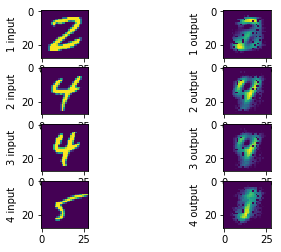

In [7]:
# plot
row = n_test
col = 2
imshow(test_input, test_output, row, col)